In [1]:
import pandas as pd

# Load the dataset
data = pd.read_excel("C:\\Users\\ASUS\\Downloads\\Data set and Objective-20241215T052244Z-001\\Data set and Objective\\Bankruptcy (2).xlsx")

print(data.head())
print(data.info())

   industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.5              1.0                    0.0          0.0   
1              0.0              1.0                    0.0          0.0   
2              1.0              0.0                    0.0          0.0   
3              0.5              0.0                    0.0          0.5   
4              1.0              1.0                    0.0          0.0   

   competitiveness  operating_risk       class  
0              0.0             0.5  bankruptcy  
1              0.0             1.0  bankruptcy  
2              0.0             1.0  bankruptcy  
3              0.0             1.0  bankruptcy  
4              0.0             1.0  bankruptcy  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    flo

In [2]:
# Checking for missing values
print(data.isnull().sum())

# Handling missing values
data = data.dropna() 

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64


       industrial_risk  management_risk  financial_flexibility  credibility  \
count       250.000000       250.000000             250.000000   250.000000   
mean          0.518000         0.614000               0.376000     0.470000   
std           0.411526         0.410705               0.401583     0.415682   
min           0.000000         0.000000               0.000000     0.000000   
25%           0.000000         0.500000               0.000000     0.000000   
50%           0.500000         0.500000               0.500000     0.500000   
75%           1.000000         1.000000               0.500000     1.000000   
max           1.000000         1.000000               1.000000     1.000000   

       competitiveness  operating_risk  
count       250.000000      250.000000  
mean          0.476000        0.570000  
std           0.440682        0.434575  
min           0.000000        0.000000  
25%           0.000000        0.000000  
50%           0.500000        0.500000  
7

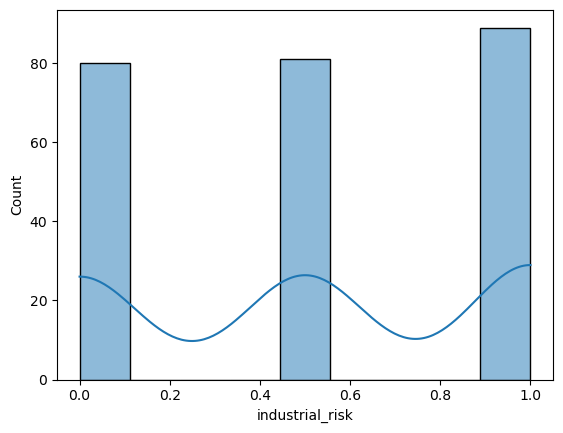

In [3]:
# Statistics
print(data.describe())

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['industrial_risk'], kde=True)
plt.show()

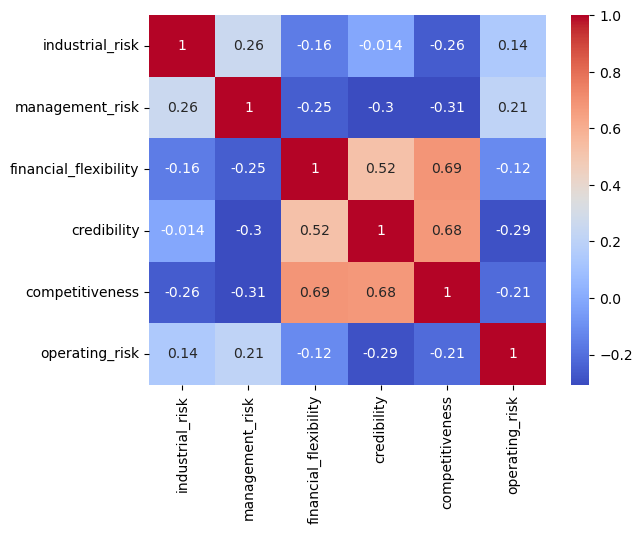

In [4]:
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

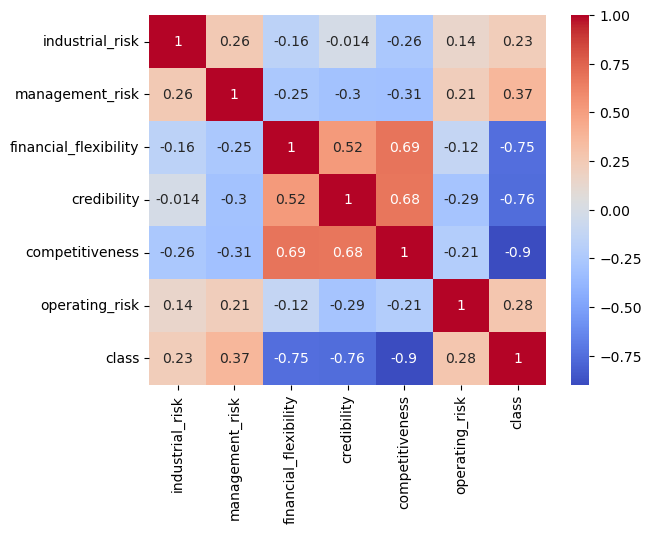

In [5]:
# Encode the target column
data['class'] = data['class'].map({'bankruptcy': 1, 'non-bankruptcy': 0})

# Compute correlation matrix after encoding
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Model Building

In [6]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = data.drop('class', axis=1) 
y = data['class']  

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Accuracy: 1.0


In [8]:
from sklearn.model_selection import GridSearchCV

# Define parameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'n_estimators': 50}


Model Evaluation

ROC-AUC: 1.0


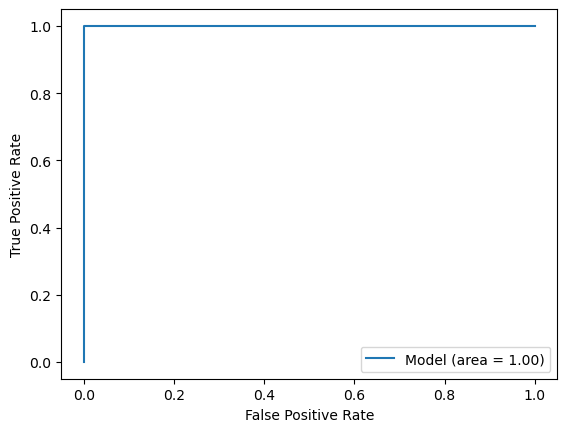

In [9]:
from sklearn.metrics import roc_auc_score, roc_curve

# Compute ROC-AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC-AUC:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="Model (area = {:.2f})".format(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

Deployment

In [10]:
pip install streamlit

In [15]:
import joblib

# Load the trained model
model = joblib.load("C:\\Users\\ASUS\\Documents\\Projects\\bankruptcy_model.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ASUS\\Documents\\Projects\\bankruptcy_model.pkl'

In [11]:
import streamlit as st
import numpy as np

# Title
st.title("Bankruptcy Prediction")

# Input features
industrial_risk = st.slider("Industrial Risk (0 to 1)", 0.0, 1.0, 0.5)
management_risk = st.slider("Management Risk (0 to 1)", 0.0, 1.0, 0.5)
financial_flexibility = st.slider("Financial Flexibility (0 to 1)", 0.0, 1.0, 0.5)
credibility = st.slider("Credibility (0 to 1)", 0.0, 1.0, 0.5)
competitiveness = st.slider("Competitiveness (0 to 1)", 0.0, 1.0, 0.5)
operating_risk = st.slider("Operating Risk (0 to 1)", 0.0, 1.0, 0.5)

# Prediction button
if st.button("Predict"):
    input_data = np.array([[industrial_risk, management_risk, financial_flexibility, 
                            credibility, competitiveness, operating_risk]])
    prediction = model.predict(input_data)[0]
    st.write(f"The predicted class is: {'Bankruptcy' if prediction == 1 else 'Non-Bankruptcy'}")

2024-12-18 17:01:12.663 
  command:

    streamlit run C:\Users\ASUS\anaconda3\anaconda3- updated\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
